In [642]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

import warnings
# suppress some MDAnalysis warnings about PSF files
#warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

import os

General settings

In [643]:
import subprocess
import glob

###### Name of the system to be analyzed

resultsdir = os.environ['SCRATCHDIR']                 # general HPC machine
name,resultsdir='dao_noNAG_TRE25','/Volumes/BackFam/calculs/lapalma/'
run='md'
dataframedir = './data/'

Reading all results files

In [644]:
##### PARM file

parmfile=resultsdir+name+'.parm7'

##### TRAJECTORY FILES

#trajfile=resultsdir+run+name+'.nc'
trajfiles = sorted(glob.glob(resultsdir+run+name+'??.nc'))
print('trajectory files:',trajfiles)

##### MDOUT files

mdoutfiles = sorted(glob.glob(resultsdir+run+name+'??.mdout'))
print(mdoutfiles)
pipe = subprocess.run(["process_mdout.perl"]+mdoutfiles,
                      check=True,
                      text=True,
                      capture_output=True)

trajectory files: ['/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE25_1.nc', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE25_2.nc', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE25_3.nc']
['/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE25_1.mdout', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE25_2.mdout', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE25_3.mdout']


In [645]:
# some information
u = mda.Universe(parmfile,trajfiles)
protein = u.select_atoms("protein")
print('Universe:',u)
#print(hasattr(u, 'trajectory'))
print('Trajectory of run {0} contains {1} steps'.format(run,len(u.trajectory)))
#print(u.residues)
#print(u.atoms)
#print(u.select_atoms('resname TPQ').n_atoms)
#print(u.atoms[:45].names)

Universe: <Universe with 130197 atoms>
Trajectory of run md contains 321 steps


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/topology/TOPParser.py:306: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


In [646]:
time = []
rgyr = []
for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(protein.radius_of_gyration())


now transform into a pandas dataframe and plot

In [647]:
import pandas as pd
# rgyr_df = pd.DataFrame(time,rgyr, columns=['Radius of gyration (A)'], index=None)
# rgyr_df.index.name = 'Time (ps)'



rgyr_df = pd.DataFrame(list(zip(time, rgyr)),
               columns =['Time (ps)', 'Radius of gyration (A)'],
               index=None)
rgyr_df.to_csv(dataframedir+name+'RG.csv',index=False)
rgyr_df.head()
rgyr_df.size

642

Time (ps) Radius of gyration (A)


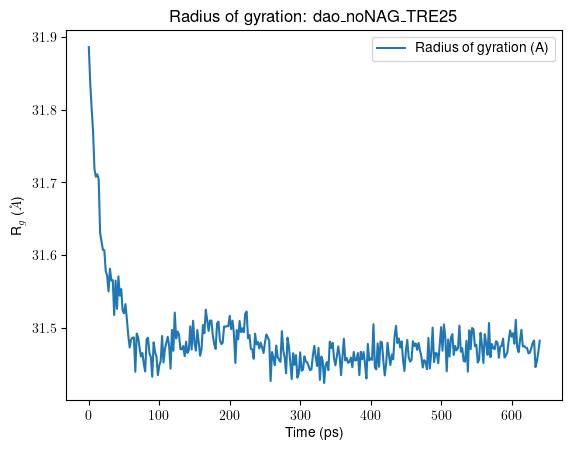

In [648]:
%matplotlib inline

x_name = rgyr_df.columns[0]
y_name = rgyr_df.columns[1]
print(x_name,y_name)
x=rgyr_df[x_name]
y=rgyr_df[y_name]

# plt.title('Radius of gyration: '+name)
# plt.plot(x,y)
# plt.savefig('../text/figures/'+name+'RG.png')

ax = rgyr_df.plot(title='Radius of gyration: '+name,x=x_name, y=y_name,kind='line')
ax.set_ylabel(r'R$_g$ ($\AA$)')
plt.savefig('../text/figures/'+name+'RG.png')


now run a complete RMSD plot

The resultsdir are stored in the `.rmsd` attribute. This is an array with the shape `(n_frames, 2 + n_selections)`.

In [649]:
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone')
rmsd_analysis.run()
rmsd_analysis.results.rmsd.shape
print(rmsd_analysis.rmsd.shape)

rmsd_df = pd.DataFrame(rmsd_analysis.results.rmsd,
                       columns=['Frame', 'Time (ps)', 'Backbone'])
rmsd_df = rmsd_df[['Time (ps)', 'Backbone']]
rmsd_df.to_csv(dataframedir+name+'RMSD.csv',index=False)
rmsd_df.head()



(321, 3)


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


,Time (ps),Backbone
0,0.0,0.000001
1,2.0,0.516860
2,4.0,0.579857
3,6.0,0.610719
4,8.0,0.643428


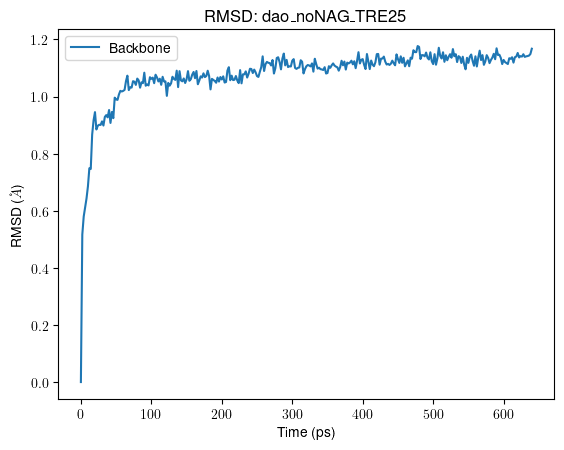

In [650]:
ax = rmsd_df.plot(title='RMSD: '+name,x='Time (ps)', y=['Backbone'],kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')
plt.savefig('../text/figures/'+name+'RMSD.png')

# Fast processing of output with `process_mdout.perl`

plot a collection of graphs to check the process of the calculation


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v5/vwzdch316vzcj9qldllr58800000gp/T/ipykernel_20068/2634534306.py:26: SyntaxWarning: invalid escape sequence '\s'
  temp_df = pd.read_csv("summary."+key,names=colnames,sep='\s+',index_col=None)


{'DENSITY': '$\\rho$', 'EKCMT': 'E_k CMT / kcal mol$^-1$', 'EKTOT': 'E_k / kcal mol$-1$', 'EPTOT': 'E_p / kcal mol$-1$', 'ESCF': 'ESCF', 'ETOT': 'E_tot / kcal mol$-1$', 'PRES': 'PRESS', 'TEMP': 'T / K', 'TSOLUTE': 'T / K', 'TSOLVENT': 'T / K'}
EKTOT E_k / kcal mol$-1$
   Time (ps)       EKTOT
0       20.2  65113.7265
1       20.4  64788.1588
2       20.6  65067.8540
3       20.8  65101.7170
4       21.0  65019.0155
EPTOT E_p / kcal mol$-1$
   Time (ps)        EPTOT
0       20.2 -624836.7898
1       20.4 -624757.0890
2       20.6 -625103.4108
3       20.8 -625205.9219
4       21.0 -625460.9088
ETOT E_tot / kcal mol$-1$
   Time (ps)         ETOT
0       20.2 -559723.0634
1       20.4 -559968.9302
2       20.6 -560035.5568
3       20.8 -560104.2049
4       21.0 -560441.8933
PRES PRESS
   Time (ps)   PRES
0       20.2 -229.5
1       20.4 -145.3
2       20.6 -181.1
3       20.8 -313.3
4       21.0 -229.0
TEMP T / K
   Time (ps)    TEMP
0       20.2  301.95
1       20.4  300.44
2       20.6 

1 T / K: dao_noNAG_TRE25
2 T / K: dao_noNAG_TRE25
3 T / K: dao_noNAG_TRE25
4 T / K: dao_noNAG_TRE25


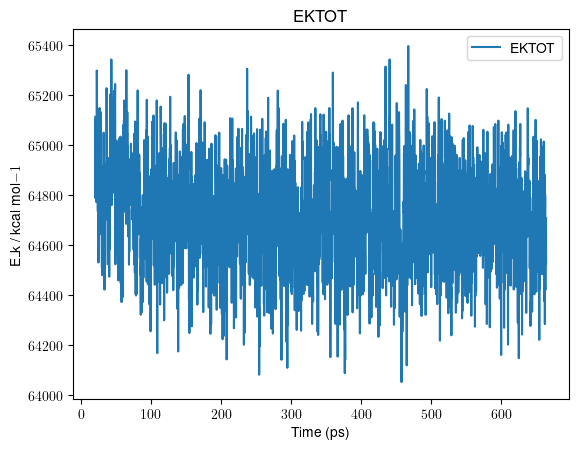

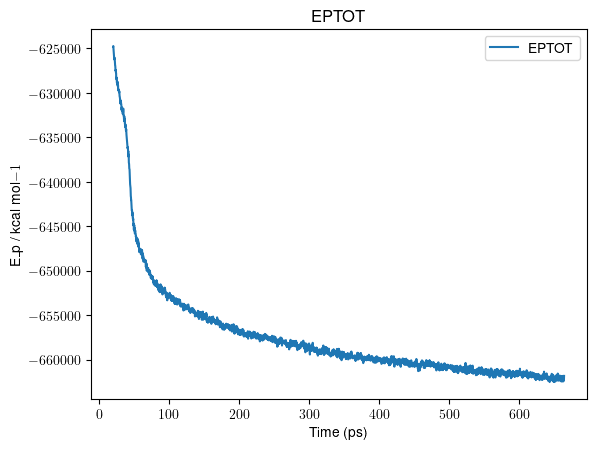

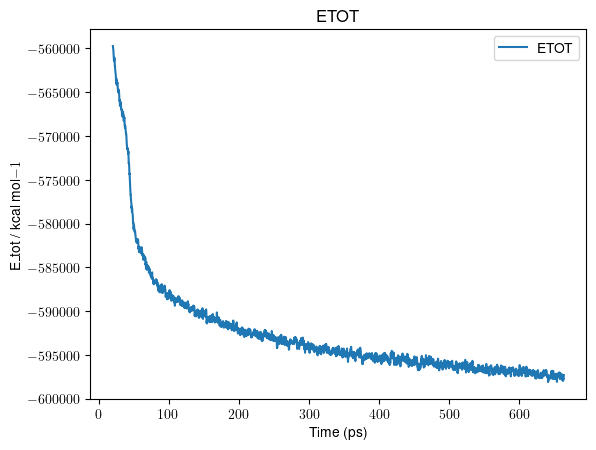

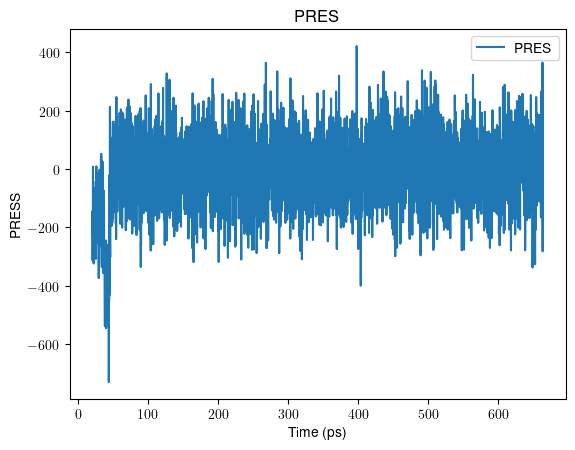

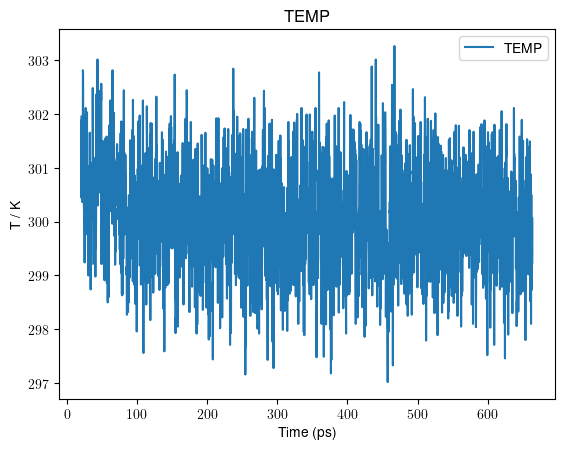

In [651]:
import sys
# assign dataset names
data = {'DENSITY':r'$\rho$',
        'EKCMT':r'E_k CMT / kcal mol$^-1$',
        'EKTOT':r'E_k / kcal mol$-1$',
        'EPTOT':r'E_p / kcal mol$-1$',
        'ESCF':r'ESCF',
        'ETOT':r'E_tot / kcal mol$-1$',
        'PRES':r'PRESS',
        'TEMP':r'T / K',
        'TSOLUTE':r'T / K',
        'TSOLVENT':r'T / K'}#,
#        'VOLUME':r'V / $\AA^3$'}

print(data)
 
# create empty lists
dataframes_list = []
Ylabel_list = []
Title_list = []

# append datasets into the list
for key, value in data.items():
    colnames=['Time (ps)',key]
    #print(colnames)
    temp_df = pd.read_csv("summary."+key,names=colnames,sep='\s+',index_col=None)
    if not temp_df.isnull().values.any():
        print(key,value)
        print(temp_df.head())
   # if temp_df.axes[1] == 1:

        dataframes_list.append(temp_df)
        temp_df.to_csv(dataframedir+name+key+'.csv',index=False)
        Ylabel_list.append(value)
        Title_list.append(key)

for i in range(len(dataframes_list)):
    print(i,data[colnames[1]]+': '+name,)
    dataframes_list[i].plot(x=colnames[0],y=Title_list[i])
    plt.ylabel(Ylabel_list[i])
    plt.title(Title_list[i])
    plt.savefig('../text/figures/'+name+Title_list[i]+'.png')